In [1]:
import utils
import networks
from grad_cam import GradCAM
from plot_utils import plot_confmat, plot_gradcam

import torch
import torchvision.datasets as datasets
from torch.utils.data import DataLoader

In [2]:
device = torch.device('cuda' if torch.cuda.is_available() else 'cpu')

In [3]:
train_set = datasets.ImageFolder(root=utils.dirs['train'], transform=utils.transform['eval'])
test_set = datasets.ImageFolder(root=utils.dirs['test'], transform=utils.transform['eval'])
train_dl = DataLoader(train_set, batch_size=128)
test_dl = DataLoader(test_set, batch_size=120)

### VGG-16

In [4]:
vgg16 = networks.get_vgg16(out_features=4, path='models/lr3e-5_vgg_cuda.pth')
train_preds = utils.get_all_preds(vgg16, train_dl)
test_preds = utils.get_all_preds(vgg16, test_dl)

train_preds.shape, test_preds.shape

(torch.Size([20685, 4]), torch.Size([240, 4]))

In [5]:
train_correct = utils.get_num_correct(train_preds, torch.as_tensor(train_set.targets, device=device))
test_correct = utils.get_num_correct(test_preds, torch.as_tensor(test_set.targets, device=device))

print(f'Train Correct: {train_correct:5}\tTrain Accuracy: {(100*train_correct/len(train_set)):5.2f}%')
print(f'Test Correct: {test_correct:6}\tTest Accuracy: {(100*test_correct/len(test_set)):6.2f}%')

Train Correct: 20362	Train Accuracy: 98.44%
Test Correct:    229	Test Accuracy:  95.42%


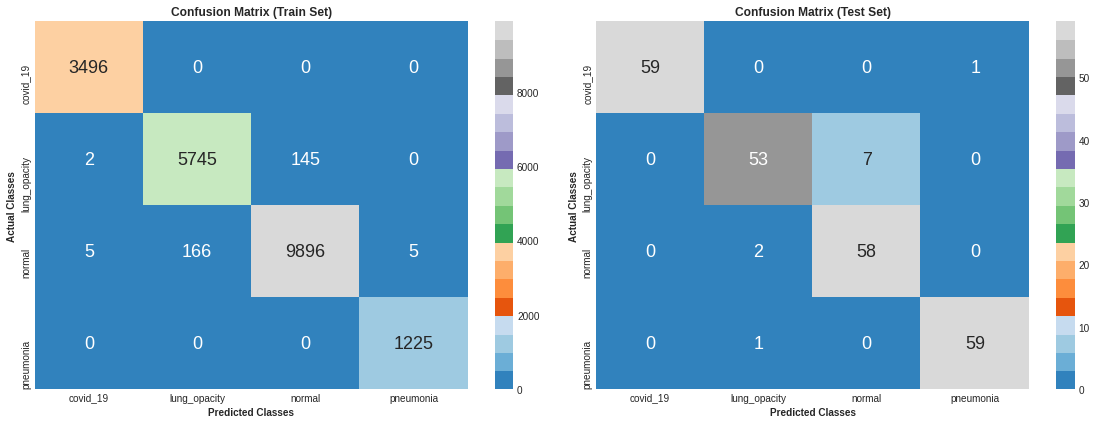

In [6]:
train_confmat = utils.get_confmat(train_set.targets, train_preds)
test_confmat = utils.get_confmat(test_set.targets, test_preds)
plot_confmat(train_confmat, test_confmat, train_set.classes, f'{type(vgg16).__name__.lower()}')

In [7]:
results = utils.get_results(test_confmat, test_set.classes)
results

{'covid_19': [0.9956521739130435, 1.0, 0.9833333333333333, 0.9915966386554621],
 'lung_opacity': [0.9581589958158996,
  0.9464285714285714,
  0.8833333333333333,
  0.9137931034482758],
 'normal': [0.9621848739495799, 0.8923076923076924, 0.9666666666666667, 0.928],
 'pneumonia': [0.9913419913419913,
  0.9833333333333333,
  0.9833333333333333,
  0.9833333333333333]}

### ResNet-18

In [8]:
resnet18 = networks.get_resnet18(out_features=4, path='models/lr3e-5_resnet_cuda.pth')
train_preds = utils.get_all_preds(resnet18, train_dl)
test_preds = utils.get_all_preds(resnet18, test_dl)

train_preds.shape, test_preds.shape

(torch.Size([20685, 4]), torch.Size([240, 4]))

In [9]:
train_correct = utils.get_num_correct(train_preds, torch.as_tensor(train_set.targets, device=device))
test_correct = utils.get_num_correct(test_preds, torch.as_tensor(test_set.targets, device=device))

print(f'Train Correct: {train_correct:5}\tTrain Accuracy: {(100*train_correct/len(train_set)):5.2f}%')
print(f'Test Correct: {test_correct:6}\tTest Accuracy: {(100*test_correct/len(test_set)):6.2f}%')

Train Correct: 20639	Train Accuracy: 99.78%
Test Correct:    230	Test Accuracy:  95.83%


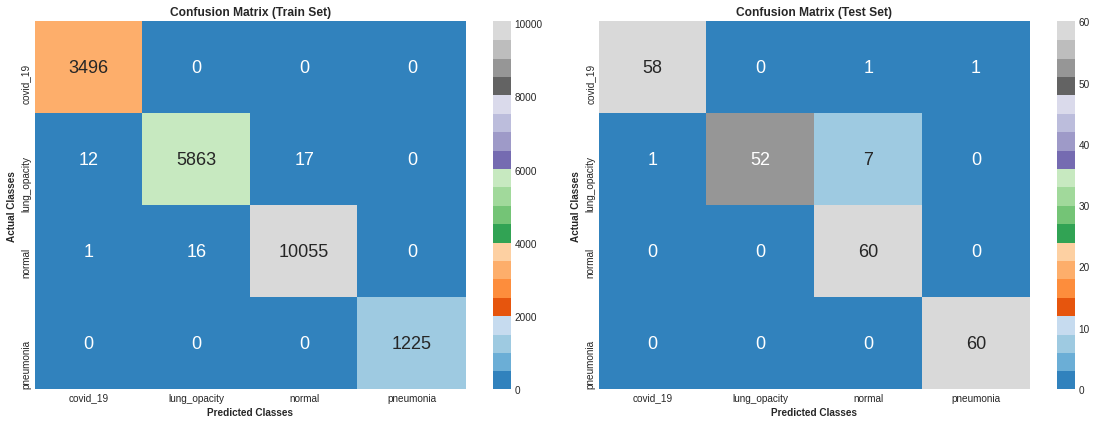

In [10]:
train_confmat = utils.get_confmat(train_set.targets, train_preds)
test_confmat = utils.get_confmat(test_set.targets, test_preds)
plot_confmat(train_confmat, test_confmat, train_set.classes, f'{type(resnet18).__name__.lower()}')

In [11]:
results = utils.get_results(test_confmat, test_set.classes)
results

{'covid_19': [0.9871244635193133,
  0.9830508474576272,
  0.9666666666666667,
  0.9747899159663865],
 'lung_opacity': [0.9663865546218487,
  1.0,
  0.8666666666666667,
  0.9285714285714286],
 'normal': [0.9663865546218487, 0.8823529411764706, 1.0, 0.9375],
 'pneumonia': [0.9956709956709957,
  0.9836065573770492,
  1.0,
  0.9917355371900827]}

### DenseNet-121

In [12]:
densenet121 = networks.get_densenet121(out_features=4, path='models/lr3e-5_densenet_cuda.pth')
train_preds = utils.get_all_preds(densenet121, train_dl)
test_preds = utils.get_all_preds(densenet121, test_dl)

train_preds.shape, test_preds.shape

(torch.Size([20685, 4]), torch.Size([240, 4]))

In [13]:
train_correct = utils.get_num_correct(train_preds, torch.as_tensor(train_set.targets, device=device))
test_correct = utils.get_num_correct(test_preds, torch.as_tensor(test_set.targets, device=device))

print(f'Train Correct: {train_correct:5}\tTrain Accuracy: {(100*train_correct/len(train_set)):5.2f}%')
print(f'Test Correct: {test_correct:6}\tTest Accuracy: {(100*test_correct/len(test_set)):6.2f}%')

Train Correct: 20540	Train Accuracy: 99.30%
Test Correct:    230	Test Accuracy:  95.83%


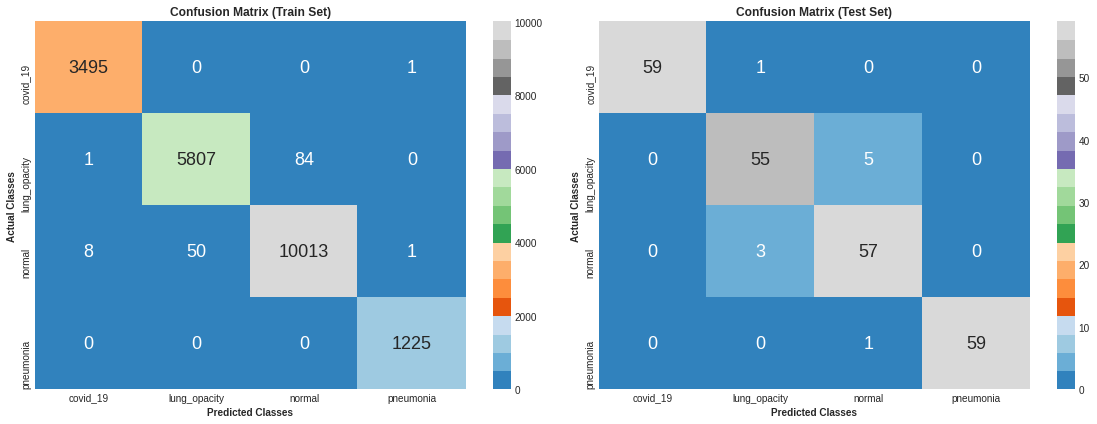

In [14]:
train_confmat = utils.get_confmat(train_set.targets, train_preds)
test_confmat = utils.get_confmat(test_set.targets, test_preds)
plot_confmat(train_confmat, test_confmat, train_set.classes, f'{type(densenet121).__name__.lower()}')

In [15]:
results = utils.get_results(test_confmat, test_set.classes)
results

{'covid_19': [0.9956709956709957, 1.0, 0.9833333333333333, 0.9915966386554621],
 'lung_opacity': [0.9623430962343096,
  0.9322033898305084,
  0.9166666666666666,
  0.9243697478991596],
 'normal': [0.9623430962343096, 0.9047619047619048, 0.95, 0.9268292682926829],
 'pneumonia': [0.9956709956709957,
  1.0,
  0.9833333333333333,
  0.9915966386554621]}

### GradCAM

/home/user00/venv/deeplearning/lib/python3.8/site-packages/torch/nn/modules/module.py:795: UserWarning: Using a non-full backward hook when the forward contains multiple autograd Nodes is deprecated and will be removed in future versions. This hook will be missing some grad_input. Please use register_full_backward_hook to get the documented behavior.
  warnings.warn("Using a non-full backward hook when the forward contains multiple autograd Nodes "


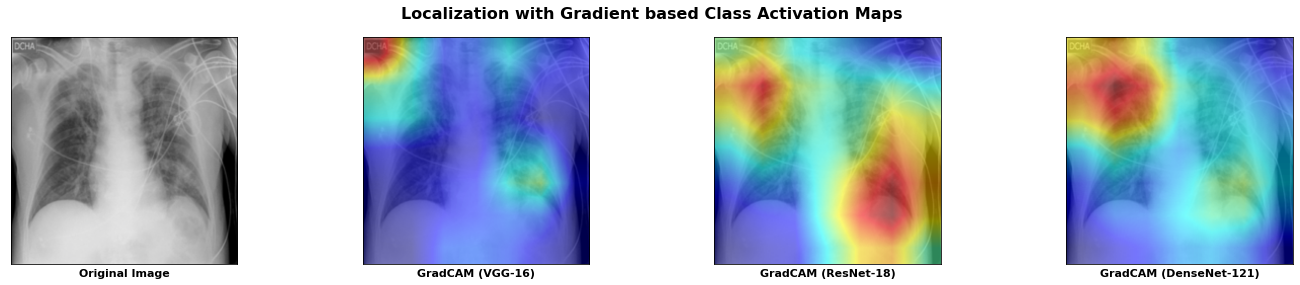

In [16]:
image, label = test_set[32]
image = image.unsqueeze(dim=0).to(device)

cam_obj = GradCAM(model=vgg16, target_layer=vgg16.features[-1])
_, vgg_cam = cam_obj(image, label)

cam_obj = GradCAM(model=resnet18, target_layer=resnet18.layer4[-1])
_, res_cam = cam_obj(image, label)

cam_obj = GradCAM(model=densenet121, target_layer=densenet121.features[-1])
_, dense_cam = cam_obj(image, label)

plot_gradcam(image, vgg_cam, res_cam, dense_cam)